<a href="https://colab.research.google.com/github/fan-of-dark/UNET_Segmentation/blob/main/Brain_Tumor_Segmentation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)

Mounted at /content/drive/


In [ ]:
!pip install -q kaggle

In [ ]:
!cp  "/content/drive/MyDrive/Machine Learning/Nuclei_segmentation/kaggle.json" "/content/"
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat '/content/drive/MyDrive/Machine Learning/Nuclei_segmentation/kaggle.json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!ls ~/.kaggle

In [ ]:
token = {"username":"saivikassingamsetty","key":"0c6fd21a20e9c4b8210ec1a1a0e3d762"}

In [ ]:
import json
with open("/root/.kaggle/kaggle.json", "w") as file:
  #encodes python objects to json objects
  json.dump(token,file)

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 99% 705M/714M [00:15<00:00, 48.0MB/s]
100% 714M/714M [00:15<00:00, 48.5MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/lgg-mri-segmentation.zip", "r") as f:
  f.extractall()

In [ ]:
import shutil
shutil.rmtree("/content/lgg-mri-segmentation")

In [ ]:
import os
os.rename("/content/kaggle_3m", "/content/dataset")

In [ ]:
data_files = os.listdir("/content/dataset")
len(data_files)

112

# 2. Understanding Data

## 2.1. Data description

*   The images were obtained from The Cancer Imaging Archive (TCIA). 
*   This dataset contains brain MR images together with manual FLAIR abnormality segmentation masks.


1.   They correspond to 110 patients included in The Cancer Genome Atlas (TCGA) lower-grade glioma collection with at least fluid-attenuated inversion recovery (FLAIR) sequence and genomic cluster data available.
2.   Tumor genomic clusters and patient data is provided in data.csv file.



## 2.2. Initial Data Observations

1.   The dataset contains 110 directories(**Case ID**s) each belongs to a each of 110 patients of TCGA.
2.   It has 2 additional files README.md and data.csv 
3.    README.md contains the brief information about the data.
4.    data.csv contains
5. All images are in .tif format with 3 channels per image.
6. Each case has 3 sequences - **pre-contrast, FLAIR, post-contrast** for 101 cases but have missing post-contrast sequence for 9 cases and pre-contrast missing in 6 cases.
7. Missing sequences are replaced with FLAIR sequence.
---
8. Thus each image has become a 3 channel image.
9. masks are binary, 1 channel images
---
10. masks segment FLAIR abnormality present in FLAIR sequences.
11. File names for each case are organised like below.
---
TCGA_institution-code_patient-id_slice-number.tif

Corresponding masks have a _mask suffix.


1. Each case has various slices of .tif image and mask files corresponding to a patient.
2.tif - Tag Image File 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from skimage.io import imread, imshow
from glob import glob

In [ ]:
#how many records of case 1
files_1 = os.listdir("/content/dataset/TCGA_CS_4941_19960909")
len(files_1)
files_2 = os.listdir("/content/dataset/TCGA_CS_4942_19970222")
len(files_2)

40

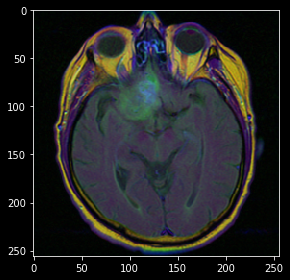

In [ ]:
#sample image
img = imread("/content/dataset/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif")
imshow(img)

In [ ]:
print(f"img has shape = {img.shape}, size = {img.size}")
print(f"img has max value = {img.max()}, min value = {img.min()}")

img has shape = (256, 256, 3), size = 196608
img has max value = 248, min value = 0


Each image has shape 256x256x3 each pixel value (0-255)

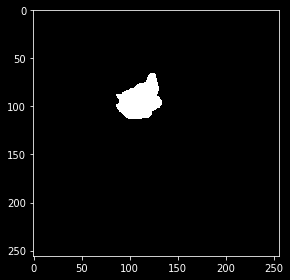

In [ ]:
#sample mask
mask = imread("/content/dataset/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif")
imshow(mask)

mask is a binary file only has only values 1 and 0

In [ ]:
cases = next(os.walk("/content/dataset/"))[1]

In [ ]:
from tqdm import tqdm

Saving Images

In [ ]:
# shutil.rmtree("/content/Club")
# !mkdir Images
# !mkdir Masks
# #viewing all images of a person at once
# #/content/dataset/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif

# for index, case in tqdm(enumerate(cases), total = len(cases)):

#   file_path = "/content/dataset/" + case
#   files = os.listdir(file_path)
#   files_num = len(files)//2
  
#   nrows = ncols = np.ceil(np.sqrt(files_num))

#   fig = plt.gcf()
#   fig.set_size_inches(5*nrows, 5*ncols)

#   for i in range(1,files_num):
#     img_path = file_path + "/" + case + f"_{i}" + ".tif" 
#     sp = plt.subplot(nrows, ncols, i)
#     sp.axis("Off")

#     img = imread(img_path)
#     plt.imshow(img)

#   plt.savefig(f"/content/Images/case_{index+1}.png")

# plt.show()

Saving the mask files

In [ ]:
# #displaying all masks of a person at once

# for index, case in tqdm(enumerate(cases), total = len(cases)):

#   file_path = "/content/dataset/" + case
#   files = os.listdir(file_path)
#   files_num = len(files)//2
  
#   nrows = ncols = np.ceil(np.sqrt(files_num))

#   fig = plt.gcf()
#   fig.set_size_inches(5*nrows, 5*ncols)

#   for i in range(1,files_num):
#     mask_path = file_path + "/" + case + f"_{i}" + "_mask" + ".tif" 
#     sp = plt.subplot(nrows, ncols, i)
#     sp.axis("Off")

#     mask = imread(mask_path)
#     plt.imshow(mask)

#   plt.savefig(f"/content/Masks/case_{index+1}.png")

# plt.show()

# !cp -r "/content/Images" "/content/drive/MyDrive/Machine Learning/projects/Brain_Tumor_Segmentation/IMAGE_INSIGHTS/Images"
# !cp -r "/content/Masks" "/content/drive/MyDrive/Machine Learning/projects/Brain_Tumor_Segmentation/IMAGE_INSIGHTS/Masks"

In [ ]:
# #first image and mask

# for ind in tqdm(range(1,111), total = 110):

#   fig = plt.figure(figsize = (10,15))
#   img = f"/content/Images/case_{ind}.png"
#   img_ = imread(img)
#   mask = f"/content/Masks/case_{ind}.png"
#   mask_ = imread(mask)

#   club = np.concatenate((img_, mask_), axis = 1)

#   plt.axis("off")
#   plt.imshow(club)

#   plt.savefig(f"/content/Club/case_{ind}.png")

# plt.show()

DATA preparation

In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

seed = 42
import random
random.seed = seed
np.random.seed = seed

In [ ]:
from skimage.transform import resize

In [ ]:
X_train = []
Y_train = []

In [ ]:
for case in tqdm(cases, total = len(cases)):
  
  data_path = f"/content/dataset/{case}/"

  for filename in glob(data_path + "*mask.tif"):

    file_ = filename.rstrip("_mask.tif")

    mask = imread(file_ + "_mask.tif")
    if mask.any():
      mask_ = np.expand_dims(a = resize(mask, (IMG_HEIGHT, IMG_WIDTH),
                                          mode = "constant", preserve_range= True),
                           axis = -1)
      Y_train.append(mask_)

      img = imread(file_ + ".tif")[:,:,:IMG_CHANNELS]
      img_ = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = "constant", preserve_range= True)
      X_train.append(img_)


100%|██████████| 110/110 [00:26<00:00,  4.08it/s]


In [ ]:
X_train = np.array(X_train, dtype = np.uint8)
Y_train = np.array(Y_train, dtype= np.uint8)

In [ ]:
X_train.shape

(1373, 256, 256, 3)

In [ ]:
Y_train.shape

(1373, 256, 256, 1)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


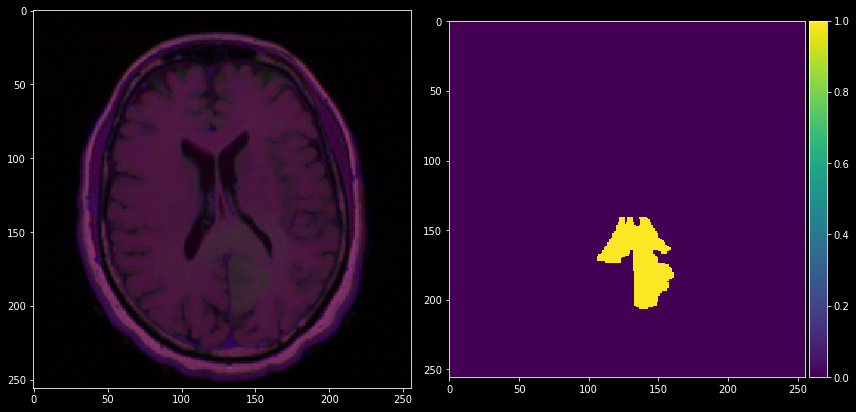

In [ ]:
#checking inputs
ind = random.randint(0,len(X_train))
fig = plt.figure(figsize= (12,8))

plt.subplot(1,2,1)
imshow(X_train[ind])
plt.subplot(1,2,2)
imshow(np.squeeze(Y_train[ind]))
plt.show()

They Seems Fine!

In [ ]:
from keras.models import Model, Sequential,load_model
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D
from keras.layers import Dropout, Lambda
from keras.layers.merge import concatenate
from keras.layers import Input, BatchNormalization, Activation
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.metrics import MeanIoU
from keras import backend as K
import tensorflow as tf

In [ ]:
def DoubleConv(inp, filters, dropout):
  # A 3X3 2D conv-dropout-conv trio
  layer1 = Conv2D(filters = filters, kernel_size = (3,3), activation= "relu", padding = "same")(inp)
  layer2 = Dropout(rate = dropout)(layer1)
  out = Conv2D(filters= filters, kernel_size= (3,3), activation= "relu", padding = "same")(layer2)
  return out

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x /255)(inputs)

#ENCODER
c1 = DoubleConv(s, 32, 0.1)

p1 = MaxPool2D((2,2))(c1)

c2 = DoubleConv(p1, 64, 0.1)
p2 = MaxPool2D((2,2))(c2)

c3 = DoubleConv(p2, 128, 0.1)
p3 = MaxPool2D((2,2))(c3)

c4 = DoubleConv(p3, 256, 0.1)
p4 = MaxPool2D((2,2))(c4)

c5 = DoubleConv(p4, 512, 0.1)

#DECODER
u6 = Conv2DTranspose(256, (2,2), strides = (2,2), padding = "same")(c5)
u6 = concatenate([u6, c4])
c6 = DoubleConv(u6, 256, 0.2)

u7 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(c6)
u7 = concatenate([u7, c3])
c7 = DoubleConv(u7, 128, 0.2)

u8 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(c7)
u8 = concatenate([u8, c2])
c8 = DoubleConv(u8, 64, 0.1)

u9 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(c8)
u9 = concatenate([u9, c1])
c9 = DoubleConv(u9, 32, 0.1)

#final layer
outputs = Conv2D(1, (1,1), activation= "sigmoid")(c9)

#model
model = Model(inputs = [inputs], outputs = [outputs])

In [ ]:
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

beta = 0.25
alpha = 0.25
gamma = 2
epsilon = 1e-5
smooth = 1


class Semantic_loss_functions(object):
    def __init__(self):
        print ("semantic loss functions initialized")

    def dice_coef(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        return (2. * intersection + K.epsilon()) / (
                    K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

    def sensitivity(self, y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    def specificity(self, y_true, y_pred):
        true_negatives = K.sum(
            K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
        possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
        return true_negatives / (possible_negatives + K.epsilon())

    def convert_to_logits(self, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(),
                                  1 - tf.keras.backend.epsilon())
        return tf.math.log(y_pred / (1 - y_pred))

    def weighted_cross_entropyloss(self, y_true, y_pred):
        y_pred = self.convert_to_logits(y_pred)
        pos_weight = beta / (1 - beta)
        loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred,
                                                        targets=y_true,
                                                        pos_weight=pos_weight)
        return tf.reduce_mean(loss)

    def focal_loss_with_logits(self, logits, targets, alpha, gamma, y_pred):
        weight_a = alpha * (1 - y_pred) ** gamma * targets
        weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)

        return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(
            -logits)) * (weight_a + weight_b) + logits * weight_b

    def focal_loss(self, y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(),
                                  1 - tf.keras.backend.epsilon())
        logits = tf.math.log(y_pred / (1 - y_pred))

        loss = self.focal_loss_with_logits(logits=logits, targets=y_true,
                                      alpha=alpha, gamma=gamma, y_pred=y_pred)

        return tf.reduce_mean(loss)

    def depth_softmax(self, matrix):
        sigmoid = lambda x: 1 / (1 + K.exp(-x))
        sigmoided_matrix = sigmoid(matrix)
        softmax_matrix = sigmoided_matrix / K.sum(sigmoided_matrix, axis=0)
        return softmax_matrix

    def generalized_dice_coefficient(self, y_true, y_pred):
        smooth = 1.
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        score = (2. * intersection + smooth) / (
                    K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        return score

    def dice_loss(self, y_true, y_pred):
        loss = 1 - self.generalized_dice_coefficient(y_true, y_pred)
        return loss

    def bce_dice_loss(self, y_true, y_pred):
        loss = binary_crossentropy(y_true, y_pred) + \
               self.dice_loss(y_true, y_pred)
        return loss / 2.0

    def confusion(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.clip(y_pred, 0, 1)
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.clip(y_true, 0, 1)
        y_neg = 1 - y_pos
        tp = K.sum(y_pos * y_pred_pos)
        fp = K.sum(y_neg * y_pred_pos)
        fn = K.sum(y_pos * y_pred_neg)
        prec = (tp + smooth) / (tp + fp + smooth)
        recall = (tp + smooth) / (tp + fn + smooth)
        return prec, recall

    def true_positive(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pos = K.round(K.clip(y_true, 0, 1))
        tp = (K.sum(y_pos * y_pred_pos) + smooth) / (K.sum(y_pos) + smooth)
        return tp

    def true_negative(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.round(K.clip(y_true, 0, 1))
        y_neg = 1 - y_pos
        tn = (K.sum(y_neg * y_pred_neg) + smooth) / (K.sum(y_neg) + smooth)
        return tn

    def tversky_index(self, y_true, y_pred):
        y_true_pos = K.flatten(y_true)
        y_pred_pos = K.flatten(y_pred)
        true_pos = K.sum(y_true_pos * y_pred_pos)
        false_neg = K.sum(y_true_pos * (1 - y_pred_pos))
        false_pos = K.sum((1 - y_true_pos) * y_pred_pos)
        alpha = 0.7
        return (true_pos + smooth) / (true_pos + alpha * false_neg + (
                    1 - alpha) * false_pos + smooth)

    def tversky_loss(self, y_true, y_pred):
        return 1 - self.tversky_index(y_true, y_pred)

    def focal_tversky(self, y_true, y_pred):
        pt_1 = self.tversky_index(y_true, y_pred)
        gamma = 0.75
        return K.pow((1 - pt_1), gamma)

    def log_cosh_dice_loss(self, y_true, y_pred):
        x = self.dice_loss(y_true, y_pred)
        return tf.math.log((tf.exp(x) + tf.exp(-x)) / 2.0)

In [ ]:
s = Semantic_loss_functions()

semantic loss functions initialized


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss= ['binary_crossentropy'], metrics=[s.dice_coef, s.sensitivity, s.specificity])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 256, 256, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 32) 896         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 256, 256, 32) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [ ]:
#call backs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_dice_coef',
                                            patience=10,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0000001)
# early_stopper = EarlyStopping(patience= 5, verbose = 1)
checkpointer = ModelCheckpoint("brain-model-prime-1.h5", save_best_only= True)

In [ ]:
history = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 32, epochs = 20, callbacks= [learning_rate_reduction, checkpointer])

Epoch 1/20
35/35 [==============================] - 105s 2s/step - loss: 0.3795 - dice_coef: 0.0616 - sensitivity: 0.1155 - specificity: 0.8880 - val_loss: 0.0905 - val_dice_coef: 0.1232 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 2/20
35/35 [==============================] - 42s 1s/step - loss: 0.0810 - dice_coef: 0.1904 - sensitivity: 0.0000e+00 - specificity: 1.0000 - val_loss: 0.0765 - val_dice_coef: 0.2390 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 3/20
35/35 [==============================] - 42s 1s/step - loss: 0.0672 - dice_coef: 0.3410 - sensitivity: 0.0000e+00 - specificity: 1.0000 - val_loss: 0.0852 - val_dice_coef: 0.2421 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 4/20
35/35 [==============================] - 42s 1s/step - loss: 0.0668 - dice_coef: 0.3351 - sensitivity: 0.0000e+00 - specificity: 1.0000 - val_loss: 0.0696 - val_dice_coef: 0.2871 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000
Epoch 5/20
35/35 [=

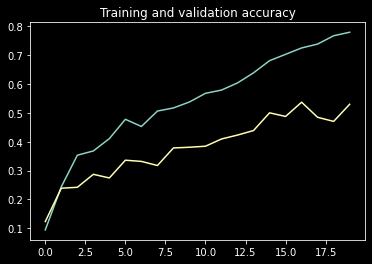

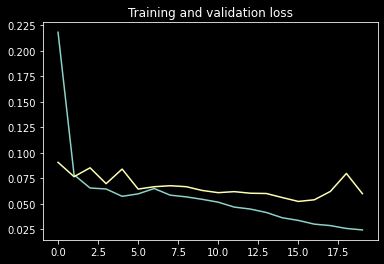

In [ ]:
dice = history.history['dice_coef']
loss = history.history['loss']
val_dice = history.history['val_dice_coef']
val_loss = history.history['val_loss']

epochs = range(len(dice))
plt.figure()

plt.plot(epochs,dice)
plt.plot(epochs, val_dice)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

plt.show()

In [ ]:
!cp "/content/brain-model-prime-1.h5" "/content/drive/MyDrive/Machine Learning/Trained Models/"

In [ ]:
X_train.shape

(1373, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split
_, X_test = train_test_split(X_train, random_state = 42, test_size=0.30)

In [ ]:
X_test.shape

(412, 256, 256, 3)

In [ ]:
y_hat = model.predict(X_test, verbose = 1)

13/13 [==============================] - 12s 1s/step


In [ ]:
y_hat.shape

(412, 256, 256, 1)

(256, 256, 3)


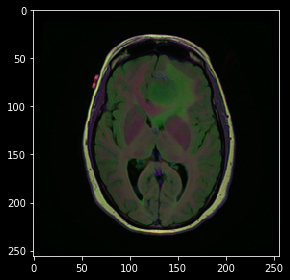

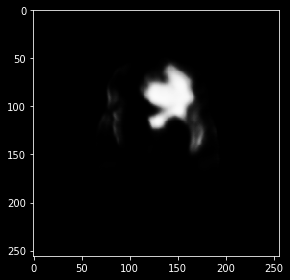

In [ ]:
id = np.random.randint(0,len(X_test)-1)
print(X_test[id].shape)
imshow(X_test[id])
plt.show()
imshow(y_hat[id][:,:,0])
plt.show()

In [ ]:
y = model.predict(X_train[0].reshape(1,256,256,3), verbose = 1)

1/1 [==============================] - 0s 53ms/step


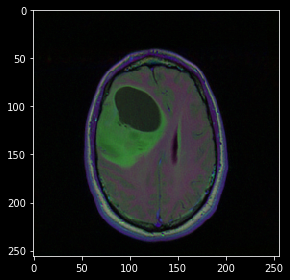

In [ ]:
imshow(X_train[0])

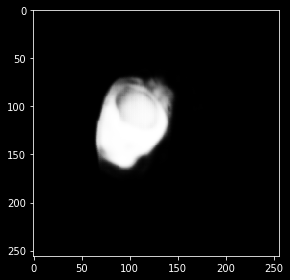

In [ ]:
imshow(y[0][:,:,0])

In [ ]:
test_img = imread("/content/drive/MyDrive/Machine Learning/projects/Brain_Tumor_Segmentation/Test_images/test-1.jpg")
test_ = resize(test_img, (IMG_HEIGHT, IMG_WIDTH, 3), mode = "constant", preserve_range= True)
test_ = test_.astype(np.uint8)

In [ ]:
test_ = test_.reshape((1,IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
test_.shape

(1, 256, 256, 3)

In [ ]:
y_test = model.predict(test_, verbose = 1)
y_test.shape

1/1 [==============================] - 0s 51ms/step


(1, 256, 256, 1)

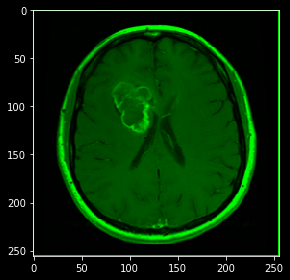

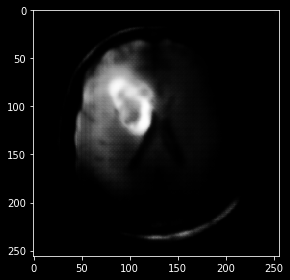

In [ ]:
imshow(test_[0])
plt.figure()
imshow(y_test[0][:,:,0])